In [28]:
import sys
print(sys.version)

3.8.2 (default, Mar 26 2020, 10:43:30) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [38]:
print(np.__version__)

1.24.2


In [41]:
pip install cupy-cuda102

ERROR: Could not find a version that satisfies the requirement cupy-cuda102 (from versions: none)
ERROR: No matching distribution found for cupy-cuda102
Note: you may need to restart the kernel to use updated packages.


### Importing

In [30]:
import extcolors
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
from PIL import Image, ImageFile


#### 배경 제거하기1

In [14]:
img = cv2.imread("./casual_036.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

mask = 255 - mask

kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

mask = cv2.GaussianBlur(mask, (0,0),  sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

cv2.imwrite('casual_new_036.png', result)

True

- input img에서 배경을 제거하고 ->png 로 변경 한후 , img의 주요 색상을 다시 재검출 해보기 

#### 배경 제거하기2 ( Used By Deep Image Matting )

In [37]:
from pymatting import *

SystemError: initialization of _internal failed without raising an exception

In [34]:
cutout("casual_036.jpg", "casual_036_tril.png", "casual_036_cutout.png")

NameError: name 'cutout' is not defined

#### 배경 제거된 이미지의 주요 색상 추출하기

In [15]:
from colorthief import ColorThief
import matplotlib.pyplot as plt
import colorsys

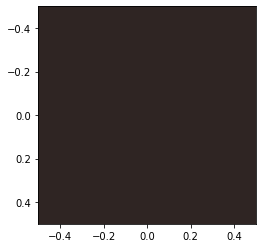

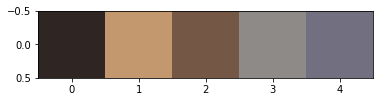

In [31]:
ct = ColorThief("Image.png")
dominant_color = ct.get_color(quality=1)

plt.imshow([[dominant_color]])
plt.show()

palette = ct.get_palette(color_count = 5)
plt.imshow([[palette[i] for i in range(5)]])
plt.show()



#### 색상 비율 비교하기

In [32]:
img = Image.open("Image.png")
colors, pixel_count = extcolors.extract_from_image(img)

pixel_output = 0
for c in colors:
    pixel_output += c[1]
    print(f'{c[0]} : {round((c[1] / pixel_count) * 100, 2)} % ({c[1]})')
print(f'Pixels in output : {pixel_output} of {pixel_count}')

(53, 35, 27) : 46.4 % (15174)
(202, 154, 84) : 8.17 % (2670)
(118, 118, 120) : 1.98 % (648)
(243, 206, 187) : 0.56 % (182)
(158, 87, 66) : 0.16 % (51)
(37, 26, 64) : 0.02 % (5)
Pixels in output : 18730 of 32700
